In [1]:
import sys

# others will need to change the below line to point at broadbandequity directory
# this is necessary so that the jupyternotebook can load our package
sys.path[0] = '/Users/drewkeller/Desktop/CS/broadbandequity'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from data_pipeline import spatial_operations as so
import numpy as np
import pandas as pd
import geopandas as gpd

In [42]:
community_areas = so.get_shapefile('community_area')
community_areas

,area,area_num_1,area_numbe,comarea,comarea_id,community_area,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."
...,...,...,...,...,...,...,...,...,...,...
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."


/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

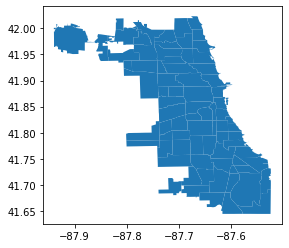

In [5]:
community_areas.plot()

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

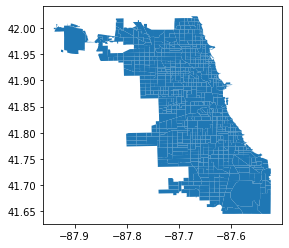

In [6]:
tracts = so.get_shapefile('tract')
tracts.plot()

We want to remove the part of the O'Hare community area that is not in tracts (that is, the tract that's not in Cook County).

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:644: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:242: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  data[:] = [


<AxesSubplot:>

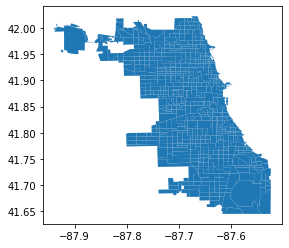

In [26]:
intersect = gpd.overlay(community_areas,tracts,how="intersection")
intersect.plot()

In [28]:
intersect[intersect['community_area']=="OHARE"]

,area,area_num_1,area_numbe,comarea,comarea_id,community_area,perimeter,shape_area,shape_len,Shape_Leng,Shape_Area,SqMiles,GEOID2,tract,geometry
479,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,9923.706491,6.097811e+06,0.218730,17170600,170600,"MULTIPOLYGON (((-87.83481 41.93805, -87.83480 ..."
488,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,20432.538710,1.657102e+07,0.594406,17170500,170500,"MULTIPOLYGON (((-87.83616 41.94477, -87.83578 ..."
490,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,54595.502685,6.610098e+07,2.371056,76760802,760802,"POLYGON ((-87.84656 41.96675, -87.84656 41.966..."
968,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,20312.410945,1.891614e+05,0.006785,76770902,770902,"MULTIPOLYGON (((-87.83663 41.97477, -87.83663 ..."
970,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,17783.234625,8.177661e+06,0.293334,76760803,760803,"POLYGON ((-87.83661 41.97733, -87.83661 41.977..."
972,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,32593.593331,2.090619e+07,0.749909,10100500,100500,"MULTIPOLYGON (((-87.83658 41.97954, -87.83658 ..."
974,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,18332.766698,1.397833e+07,0.501406,76760801,760801,"POLYGON ((-87.83658 41.98337, -87.83658 41.982..."
976,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,31436.404470,3.939306e+06,0.141304,10810400,810400,"POLYGON ((-87.83658 41.98613, -87.83658 41.984..."
1634,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,6102.900390,1.777035e+06,0.000000,76840801,840801,"MULTIPOLYGON (((-87.92000 41.95801, -87.92000 ..."
1635,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.98466,19080.560747,7.364950e+05,0.026418,76770800,770800,"MULTIPOLYGON (((-87.85444 41.95552, -87.85379 ..."


/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot:>

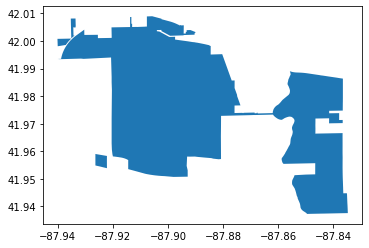

In [38]:
intersect[intersect['community_area']=="OHARE"].dissolve(by="community_area").plot()

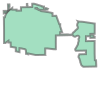

In [35]:
community_areas["geometry"][74]

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


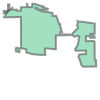

In [45]:
intersect[intersect['community_area']=="OHARE"].dissolve(by="community_area")["geometry"][0]

In [46]:
community_areas["geometry"][74] = intersect[intersect['community_area']=="OHARE"].dissolve(by="community_area")["geometry"][0]

/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/drewkeller/opt/anaconda3/envs/broadbandequity/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

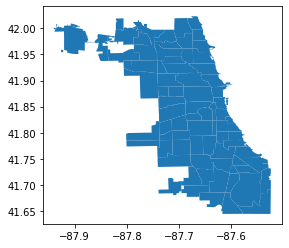

In [47]:
community_areas.plot()

Nice. 